In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


Matplotlib is building the font cache; this may take a moment.


In [5]:
file_path = '/Users/m.mughees/Desktop/2025-IEEE_SciVis-Contest-Mughees/data/Dataset_VisContest_Rapid_Alloy_development_v3.txt'

# Try reading with ISO-8859-1 encoding (Latin-1), which handles many special characters
try:
    df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
except Exception as e:
    print("Tab delimiter failed. Trying semicolon with ISO-8859-1...")
    df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Show result
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (324632, 137)


,KS1295[%],6082[%],2024[%],bat-box[%],3003[%],4032[%],Al,Si,Cu,Ni,...,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136
0,0.0,0.0,0.0,0.0,0.0,100.0,83.67500,12.25000,0.900000,1.3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,3.3,96.7,84.11885,11.86555,0.874425,1.2571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,6.6,93.4,84.56270,11.48110,0.848850,1.2142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,9.9,90.1,85.00655,11.09665,0.823275,1.1713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,13.2,86.8,85.45040,10.71220,0.797700,1.1284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_clean = df_clean.dropna(axis=1, how='all')


In [8]:
print("shape:", df_clean.shape)
df_clean.head()



shape: (324632, 67)


,KS1295[%],6082[%],2024[%],bat-box[%],3003[%],4032[%],Al,Si,Cu,Ni,...,Density(g/cm3),Volume(m3/mol),El.conductivity(S/m),El. resistivity(ohm m),heat capacity(J/(mol K)),Therm.conductivity(W/(mK)),Therm. diffusivity(m2/s),Therm.resistivity(mK/W),Linear thermal expansion (1/K)(20.0-300.0°C),Technical thermal expansion (1/K)(20.0-300.0°C)
0,0.0,0.0,0.0,0.0,0.0,100.0,83.67500,12.25000,0.900000,1.3000,...,2.65803,0.00001,11302200,8.851450e-08,27.3373,159.046,0.000060,0.006288,0.000024,0.000022
1,0.0,0.0,0.0,0.0,3.3,96.7,84.11885,11.86555,0.874425,1.2571,...,2.65879,0.00001,11414800,8.767350e-08,27.3430,160.429,0.000061,0.006232,0.000024,0.000022
2,0.0,0.0,0.0,0.0,6.6,93.4,84.56270,11.48110,0.848850,1.2142,...,2.65935,0.00001,11489900,8.708070e-08,27.3633,161.346,0.000061,0.006203,0.000024,0.000022
3,0.0,0.0,0.0,0.0,9.9,90.1,85.00655,11.09665,0.823275,1.1713,...,2.66111,0.00001,11566400,8.646380e-08,27.3806,162.105,0.000061,0.006168,0.000024,0.000022
4,0.0,0.0,0.0,0.0,13.2,86.8,85.45040,10.71220,0.797700,1.1284,...,2.66318,0.00001,11650800,8.581640e-08,27.3873,163.127,0.000061,0.006127,0.000024,0.000022


In [9]:
df_clean.describe()

,KS1295[%],6082[%],2024[%],bat-box[%],3003[%],4032[%],Al,Si,Cu,Ni,...,Density(g/cm3),Volume(m3/mol),El.conductivity(S/m),El. resistivity(ohm m),heat capacity(J/(mol K)),Therm.conductivity(W/(mK)),Therm. diffusivity(m2/s),Therm.resistivity(mK/W),Linear thermal expansion (1/K)(20.0-300.0°C),Technical thermal expansion (1/K)(20.0-300.0°C)
count,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,324632.000000,...,324632.000000,3.246320e+05,3.246320e+05,3.246320e+05,324632.000000,324632.000000,324632.000000,324632.000000,3.246320e+05,3.246320e+05
mean,16.500000,16.500000,16.500000,16.500000,16.500000,17.500000,91.024760,4.710985,1.633425,0.569050,...,2.696366,1.021455e-05,1.281434e+07,7.826354e-08,27.634033,176.167594,0.000065,0.005689,2.576857e-05,2.351497e-05
std,15.276055,15.276055,15.276055,15.276055,15.276055,15.276055,2.835679,2.273711,0.730324,0.329574,...,0.016195,3.589992e-08,6.794839e+05,4.219842e-09,0.090968,8.009061,0.000003,0.000261,7.476374e-07,6.822835e-07
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.966460,0.716500,0.058500,0.013000,...,2.657730,1.012160e-05,1.047070e+07,6.772550e-08,27.304300,148.924000,0.000056,0.005023,2.292760e-05,2.094730e-05
25%,3.300000,3.300000,3.300000,3.300000,3.300000,4.300000,89.113631,2.873941,1.072590,0.311980,...,2.684470,1.018810e-05,1.233480e+07,7.505190e-08,27.568300,170.532000,0.000063,0.005498,2.526310e-05,2.305260e-05
50%,13.200000,13.200000,13.200000,13.200000,13.200000,14.200000,91.267046,4.399894,1.554225,0.527800,...,2.695130,1.021140e-05,1.284150e+07,7.786885e-08,27.638100,176.232000,0.000065,0.005676,2.584890e-05,2.358840e-05
75%,23.100000,23.100000,23.100000,23.100000,23.100000,24.100000,93.164818,6.259213,2.118360,0.782725,...,2.706870,1.023850e-05,1.332472e+07,8.107350e-08,27.709700,181.953000,0.000067,0.005864,2.634750e-05,2.404760e-05
max,99.000000,99.000000,99.000000,99.000000,99.000000,100.000000,97.168700,12.695500,4.612500,2.012800,...,2.764370,1.035850e-05,1.476920e+07,9.548280e-08,27.803300,198.787000,0.000072,0.006719,2.735660e-05,2.495470e-05


In [13]:
df_clean.columns

Index(['KS1295[%]', '6082[%]', '2024[%]', 'bat-box[%]', '3003[%]', '4032[%]',
       'Al', 'Si', 'Cu', 'Ni', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Zr', 'V', 'Zn',
       'Vf_FCC_A1', 'Vf_DIAMOND_A4', 'Vf_AL15SI2M4', 'Vf_AL3X', 'Vf_AL6MN',
       'Vf_AL3NI2', 'Vf_AL3NI_D011', 'Vf_AL7CU4NI', 'Vf_AL2CU_C16',
       'Vf_Q_ALCUMGSI', 'Vf_AL7CU2FE', 'Vf_MG2SI_C1', 'Vf_AL9FE2SI2',
       'Vf_AL18FE2MG7SI10', 'eut. frac.[%]', 'eut. T (°C)', 'T_FCC_A1',
       'T_DIAMOND_A4', 'T_AL15SI2M4', 'T_AL6MN', 'T_AL3NI2', 'T_AL3NI_D011',
       'T_AL7CU4NI', 'T_AL2CU_C16', 'T_Q_ALCUMGSI', 'T_AL7CU2FE', 'T_MG2SI_C1',
       'T_AL9FE2SI2', 'T_AL18FE2MG7SI10', 'T(liqu)', 'T(sol)', 'delta_T',
       'delta_T_FCC', 'delta_T_Al15Si2M4', 'delta_T_Si', 'CSC', 'YS(MPa)',
       'hardness(Vickers)', 'CTEvol(1/K)(20.0-300.0°C)', 'Density(g/cm3)',
       'Volume(m3/mol)', 'El.conductivity(S/m)', 'El. resistivity(ohm m)',
       'heat capacity(J/(mol K))', 'Therm.conductivity(W/(mK))',
       'Therm. diffusivity(m2/s)', 'T

In [15]:
composition_cols = ['KS1295[%]', '6082[%]', '2024[%]', 'bat-box[%]', '3003[%]', '4032[%]',
                    'Al', 'Si', 'Cu', 'Ni', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Zr', 'V', 'Zn']

microstructure_cols = [col for col in df.columns if col.startswith('Vf_') or col.startswith('T_') or 'eut.' in col]


target_cols = ['CSC', 'YS(MPa)', 'hardness(Vickers)', 
               'Density(g/cm3)', 'El.conductivity(S/m)', 'Therm.conductivity(W/(mK))',
               'Linear thermal expansion (1/K)(20.0-300.0°C)', 
               'Technical thermal expansion (1/K)(20.0-300.0°C)',
               'Therm. diffusivity(m2/s)', 'Therm.resistivity(mK/W)', 
               'El. resistivity(ohm m)', 'heat capacity(J/(mol K))']


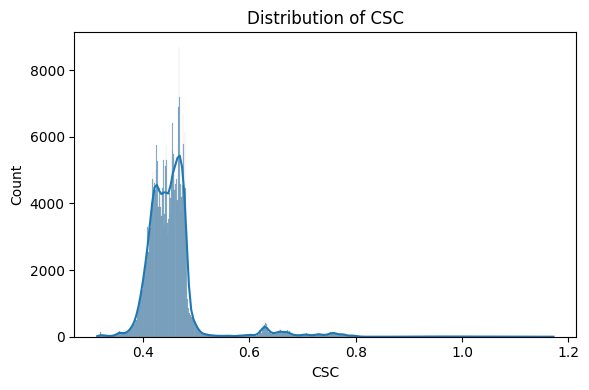

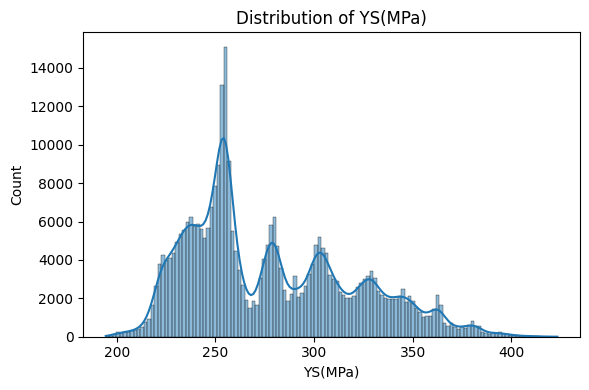

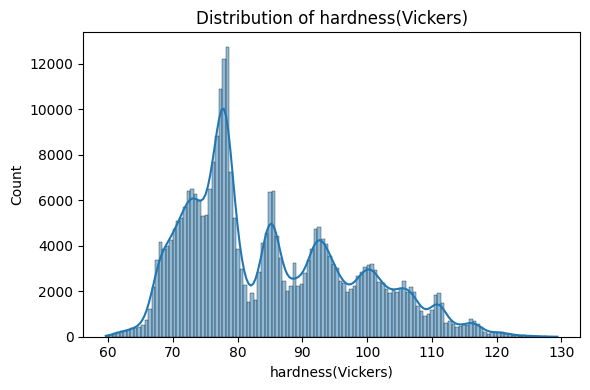

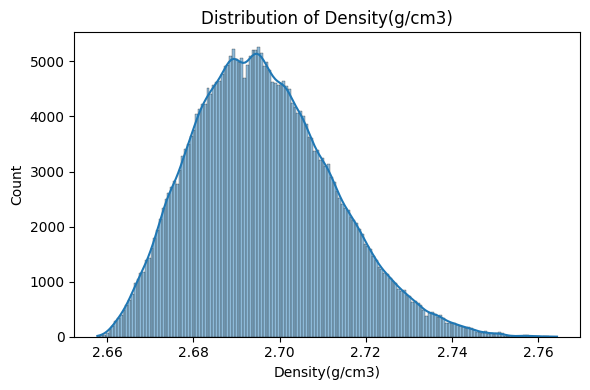

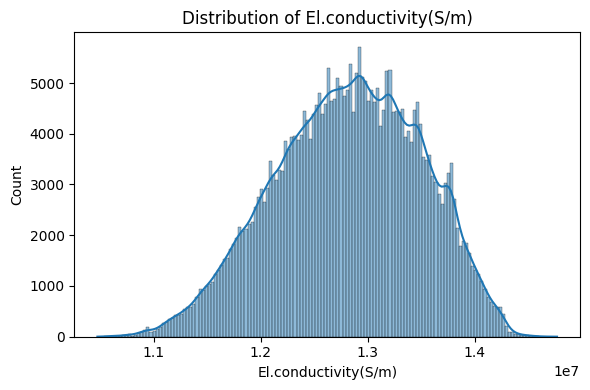

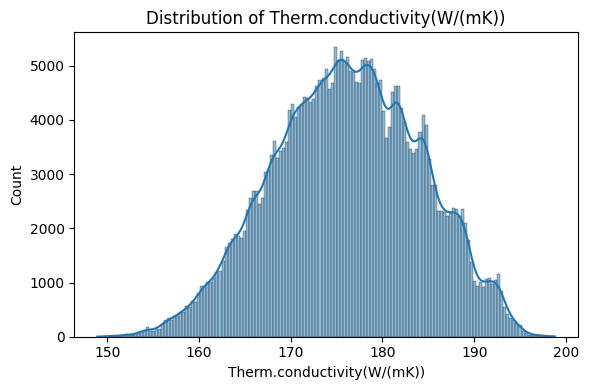

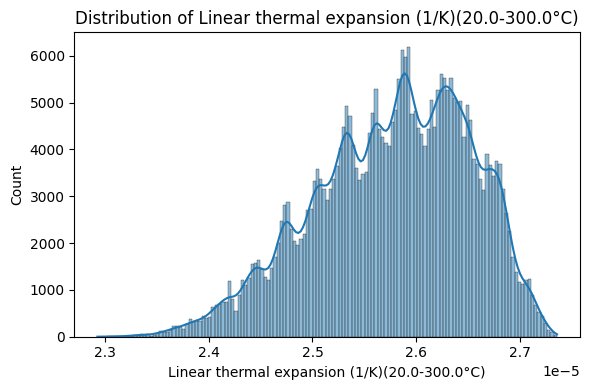

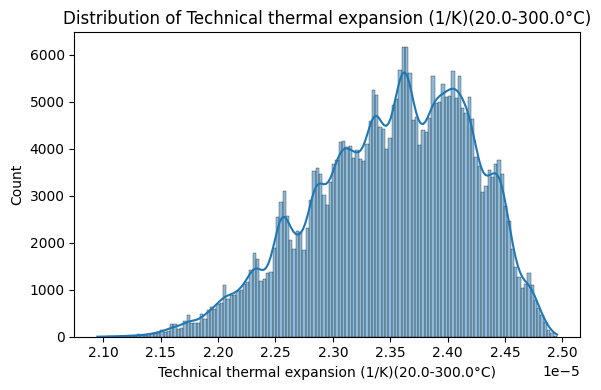

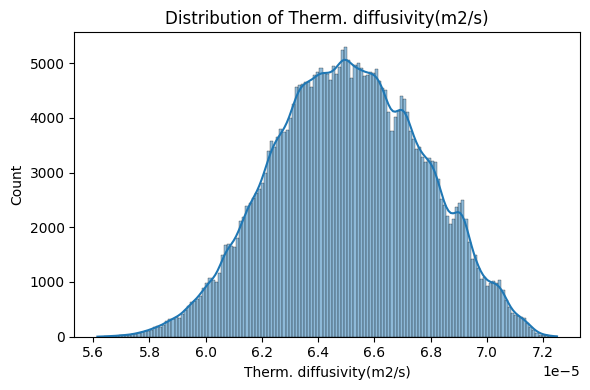

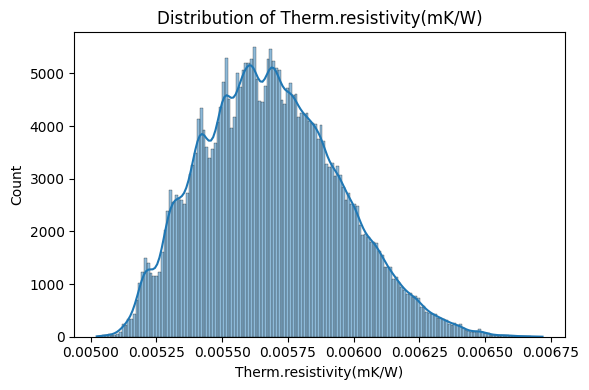

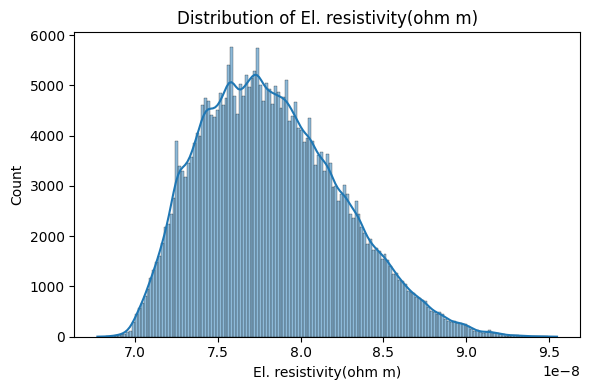

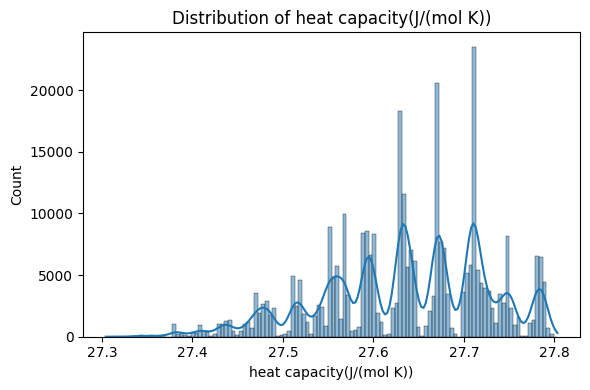

In [19]:
for col in target_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

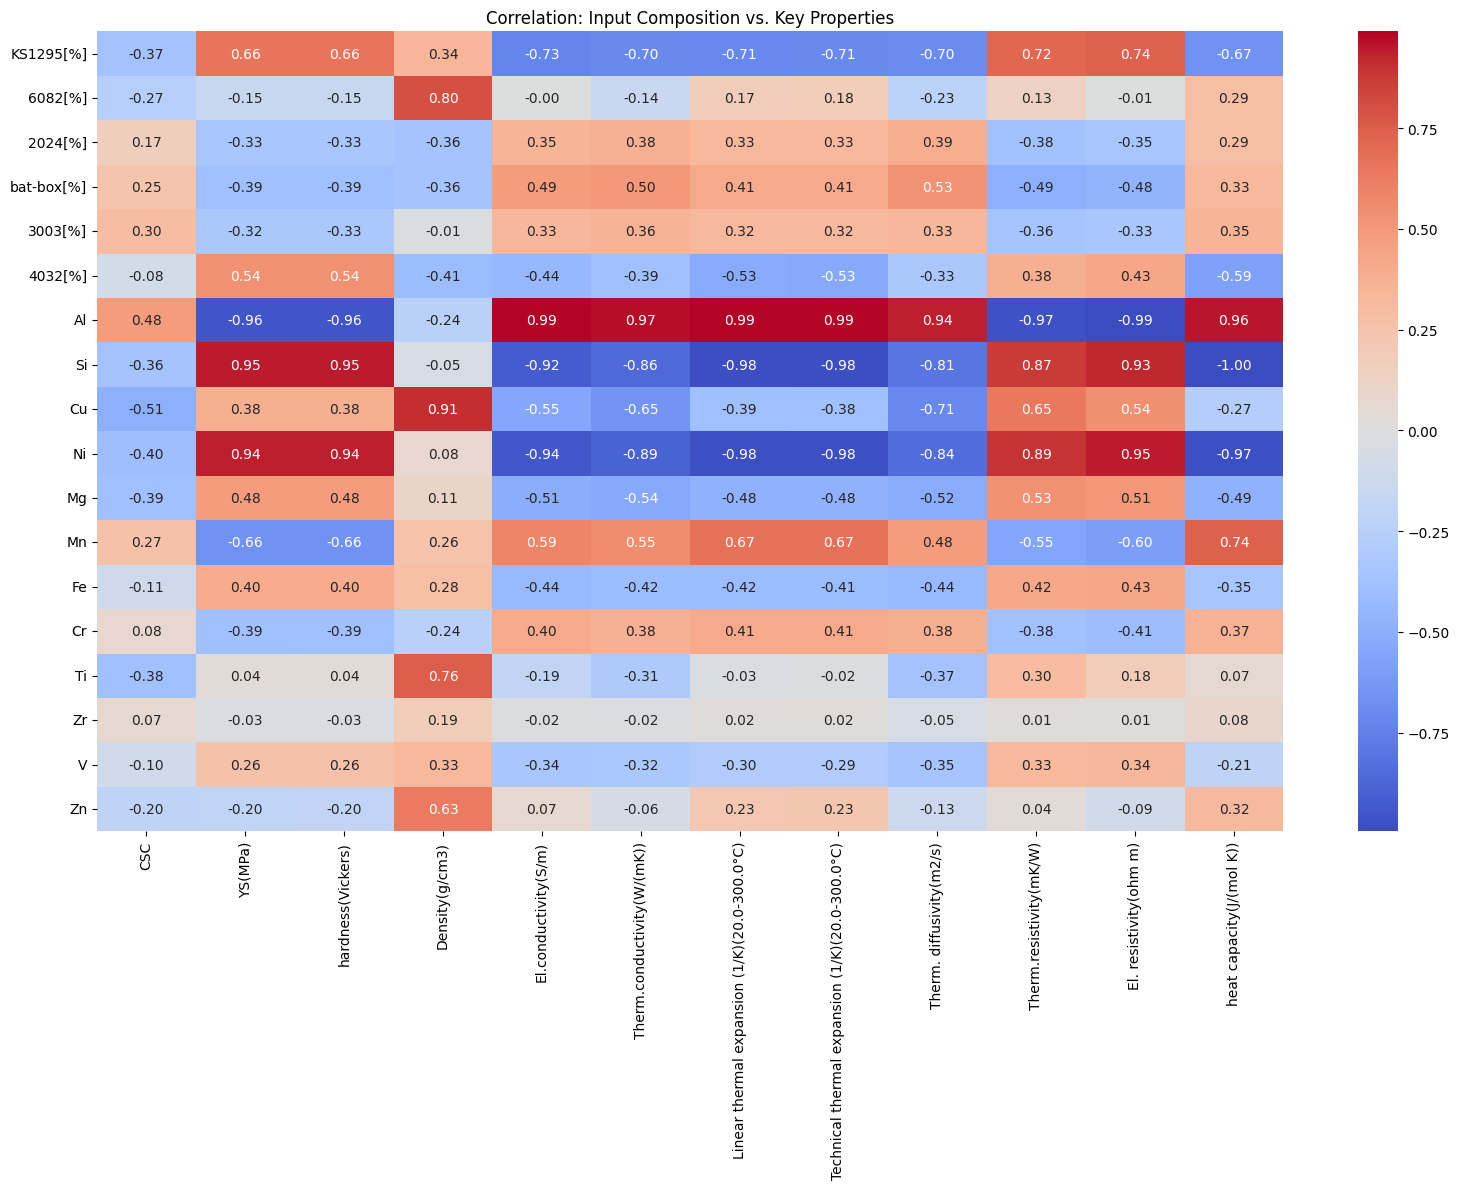

In [20]:
corr = df[composition_cols + target_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr.loc[composition_cols, target_cols], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Input Composition vs. Key Properties")
plt.tight_layout()
plt.show()


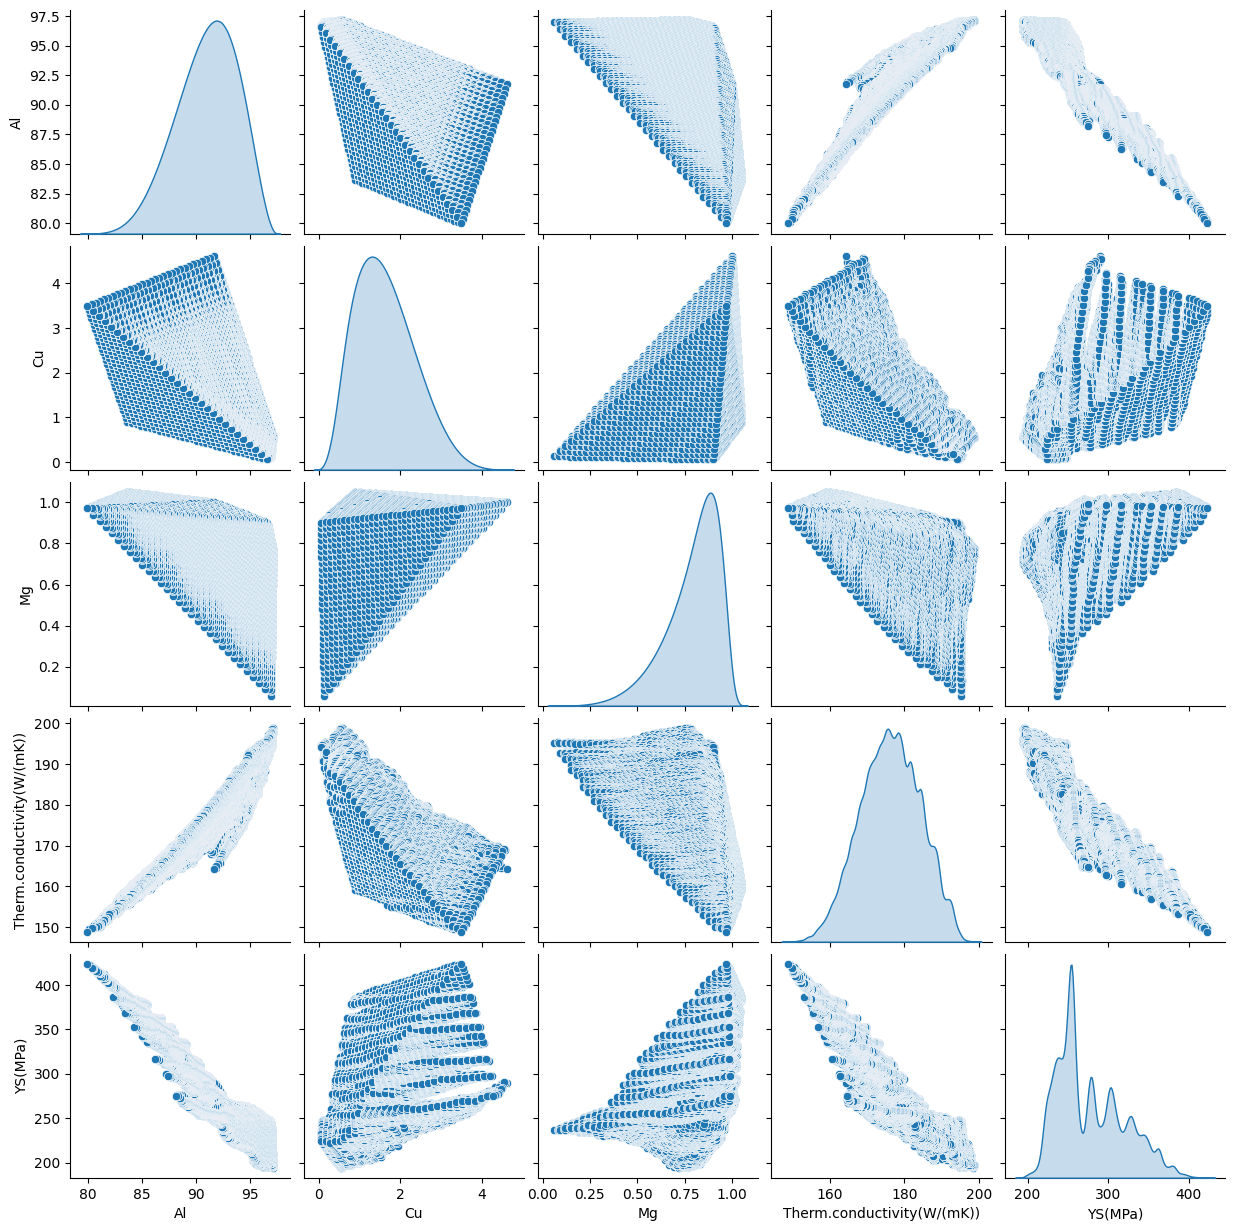

In [21]:
sns.pairplot(df, vars=['Al', 'Cu', 'Mg', 'Therm.conductivity(W/(mK))', 'YS(MPa)'], diag_kind='kde')


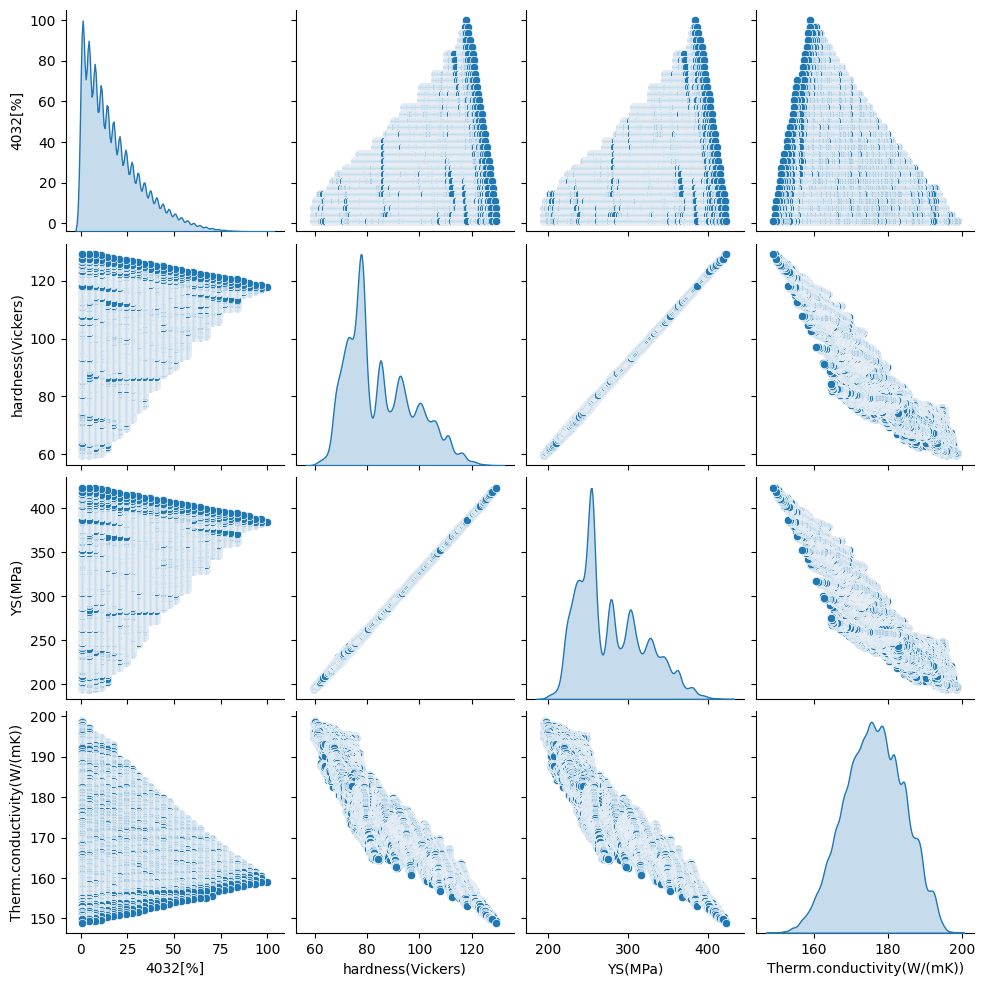

In [22]:
sns.pairplot(df, vars=['4032[%]', 'hardness(Vickers)', 'YS(MPa)', 'Therm.conductivity(W/(mK))'], diag_kind='kde')


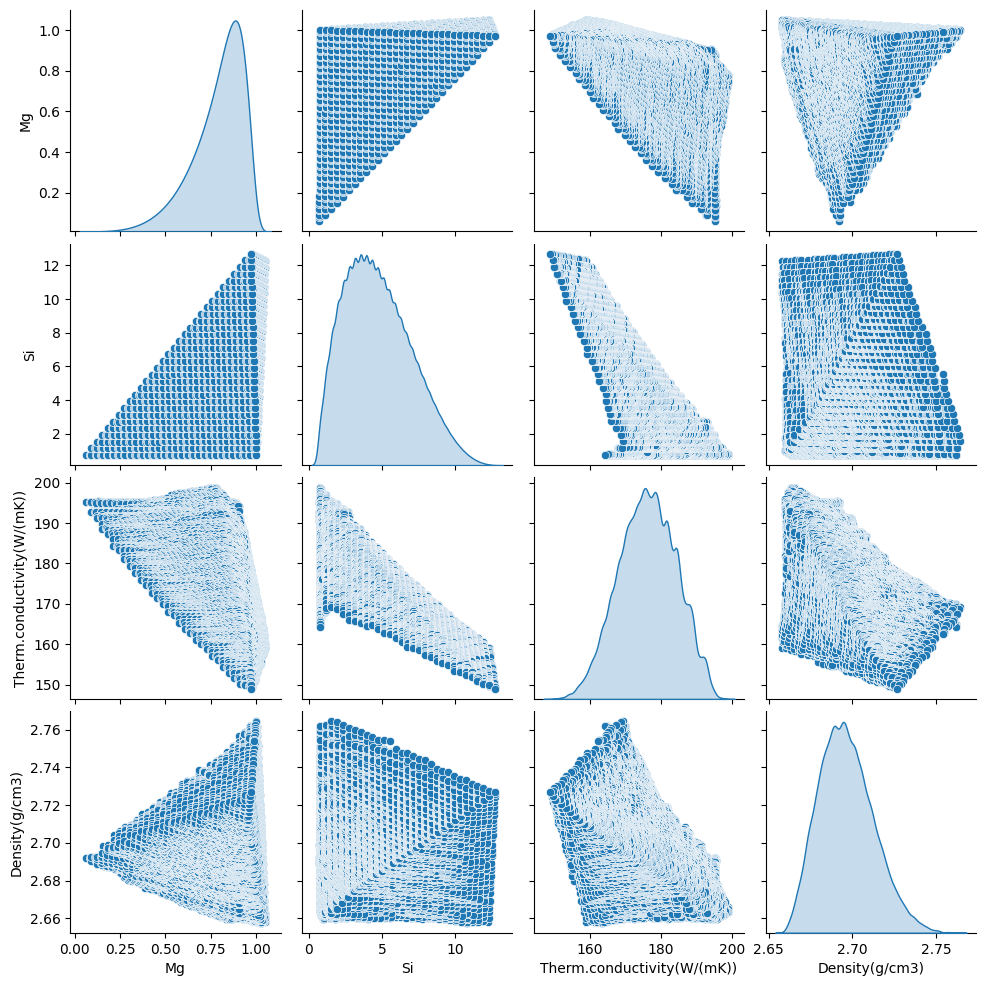

In [23]:
sns.pairplot(df, vars=['Mg', 'Si', 'Therm.conductivity(W/(mK))', 'Density(g/cm3)'], diag_kind='kde')


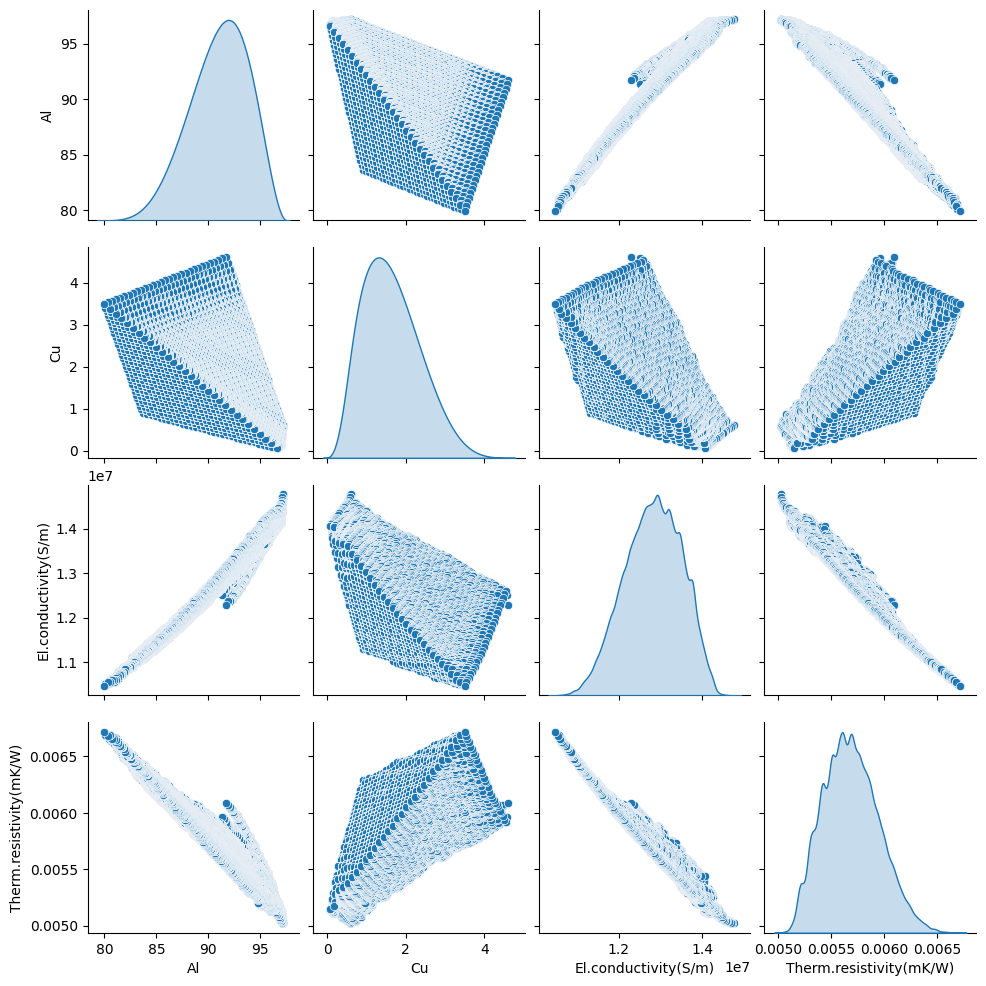

In [24]:
sns.pairplot(df, vars=['Al', 'Cu', 'El.conductivity(S/m)', 'Therm.resistivity(mK/W)'], diag_kind='kde')


## 📊 Exploratory Data Analysis (EDA) Summary

Our exploratory analysis revealed key patterns in the material properties of simulated aluminum alloys created from six scrap sources. The **Yield Strength (YS)** and **Hardness** distributions suggest the presence of multiple high-performance alloy clusters, with YS peaking around 250–300 MPa and hardness values concentrated between 75–90 HV. Meanwhile, properties like **Electrical Conductivity**, **Thermal Conductivity**, and **Density** displayed more unimodal, bell-shaped distributions centered around standard aluminum values—e.g., ~1.3×10⁷ S/m for conductivity and ~2.70 g/cm³ for density. This suggests a stable aluminum base with selective variability introduced through specific alloying elements.

The **correlation heatmap** highlighted clear trade-offs between material properties. Higher **Aluminum content** was strongly associated with improved electrical and thermal performance but lower mechanical strength and expansion. Conversely, elements like **Copper** and **Nickel** contributed to increased **YS** and **hardness**, but often at the cost of reduced conductivity and increased thermal expansion. These trends have practical implications: depending on the application—whether aerospace, automotive, or utility—optimal scrap mixes will need to strategically balance conductivity, strength, and expansion for their specific performance envelope.

> ✅ These findings help guide our alloy optimization scenarios and shape how we filter or rank potential candidates for each use case.


## ⚡ Utility Industry Application: Xcel Energy Use Case

In the context of power utilities like **Xcel Energy**, aluminum alloys are widely used in components such as transmission lines, busbars, and heat exchangers due to their excellent electrical and thermal conductivity, lightweight nature, and corrosion resistance.

Our EDA shows promising trends for this industry:

- **High Electrical Conductivity (~1.3×10⁷ S/m)**  
  The majority of alloys maintain conductivity levels suitable for power transmission. Alloys with higher **Al** and **Si** content generally show improved conductivity while maintaining structural integrity.

- **Low Thermal Expansion & High Thermal Conductivity**  
  For stable performance under fluctuating temperatures (e.g., outdoor substations), low thermal expansion (~2.3–2.7×10⁻⁵ 1/K) and high thermal conductivity (~170–180 W/mK) are desirable. These ensure materials don’t deform or degrade under thermal cycling, crucial for high-load equipment.

- **Balanced Yield Strength & Hardness**  
  Although mechanical strength is secondary to conductivity in this case, moderate **YS (~250–300 MPa)** and **Hardness (~75–90 HV)** ensure the alloys can endure environmental stressors and mechanical loading during installation and operation.

> ⚠️ **Design Implication**:  
> Alloys for Xcel Energy should prioritize high **Al content** with controlled additions of **Si** and **Mg**, avoiding excessive Cu or Ni, which could impair conductivity. Selection criteria should filter for:
> - **Electrical Conductivity > 1.25×10⁷ S/m**
> - **Thermal Conductivity > 170 W/mK**
> - **Thermal Expansion < 2.6×10⁻⁵ 1/K**
> - **Yield Strength > 250 MPa**

✅ This targeted filtering can help identify scrap alloy blends that are sustainable, cost-effective, and performance-optimized for power transmission infrastructure.

